In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df1 = pd.read_csv("data/compas-scores-raw.csv")
df1

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,65667,79665,72038,Probation,West,James,NaN,Male,African-American,06/21/64,...,3,Medium with Override Consideration,8,Risk of Recidivism,0.16,8,High,New,1,0
60839,65667,79665,72038,Probation,West,James,NaN,Male,African-American,06/21/64,...,3,Medium with Override Consideration,18,Risk of Failure to Appear,35.00,10,High,New,1,0
60840,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,...,1,Low,7,Risk of Violence,-2.75,2,Low,New,1,0
60841,68603,79669,72042,PRETRIAL,Ryan,Michael,NaN,Male,Caucasian,02/06/85,...,1,Low,8,Risk of Recidivism,-0.34,5,Medium,New,1,0


In [52]:
df1.columns

Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text',
       'DateOfBirth', 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType', 'IsCompleted', 'IsDeleted'],
      dtype='object')

In [5]:
# Select categorical columns (object or category dtype)
categorical_cols = df1.select_dtypes(include=["object", "category"]).columns

# Build summary dataframe
summary = pd.DataFrame({
    "column": categorical_cols,
    "unique_values": [df1[col].unique().tolist() for col in categorical_cols]
})
summary

,column,unique_values
0,Agency_Text,"[PRETRIAL, Probation, DRRD, Broward County]"
1,LastName,"[Fisher, KENDALL, DAYES, Debe, McLaurin, Holla..."
2,FirstName,"[Kevin, KEVIN, DANIEL, Mikerlie, Stephanie, Te..."
3,MiddleName,"[nan, George, Nicole, B, Joseph, Lavon, OLVERA..."
4,Sex_Code_Text,"[Male, Female]"
5,Ethnic_Code_Text,"[Caucasian, African-American, Hispanic, Other,..."
6,DateOfBirth,"[12/05/92, 09/16/84, 08/25/94, 10/09/94, 06/29..."
7,ScaleSet,"[Risk and Prescreen, All Scales]"
8,AssessmentReason,[Intake]
9,Language,"[English, Spanish]"


In [33]:
# Join the two different African-American entries a single one
df1['Ethnic_Code_Text'] = df1['Ethnic_Code_Text'].replace('African-Am', 'African-American')

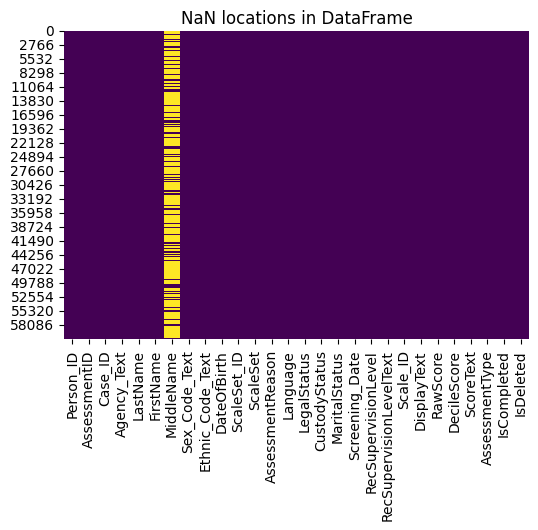

In [34]:
# Plot heatmap of NaNs
plt.figure(figsize=(6,4))
sns.heatmap(df1.isna(), cbar=False, cmap="viridis")
plt.title("NaN locations in DataFrame")
plt.show()

In [35]:
df1.isna().sum()

Person_ID                      0
AssessmentID                   0
Case_ID                        0
Agency_Text                    0
LastName                       0
FirstName                      0
MiddleName                 45219
Sex_Code_Text                  0
Ethnic_Code_Text               0
DateOfBirth                    0
ScaleSet_ID                    0
ScaleSet                       0
AssessmentReason               0
Language                       0
LegalStatus                    0
CustodyStatus                  0
MaritalStatus                  0
Screening_Date                 0
RecSupervisionLevel            0
RecSupervisionLevelText        0
Scale_ID                       0
DisplayText                    0
RawScore                       0
DecileScore                    0
ScoreText                     45
AssessmentType                 0
IsCompleted                    0
IsDeleted                      0
dtype: int64

## Raw Score

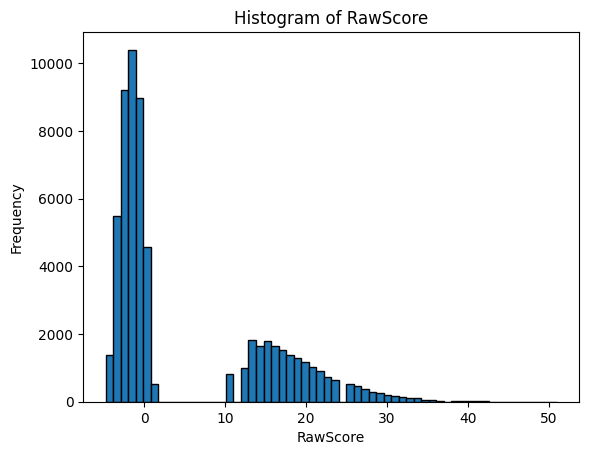

In [36]:
plt.hist(df1["RawScore"], bins=60, edgecolor="black")
plt.xlabel("RawScore")
plt.ylabel("Frequency")
plt.title("Histogram of RawScore")
plt.show()

In [37]:
df1["RawScore"].describe()

count    60843.000000
mean         5.081457
std         10.080518
min         -4.790000
25%         -2.090000
50%         -0.710000
75%         14.000000
max         51.000000
Name: RawScore, dtype: float64

### Raw Score - Women

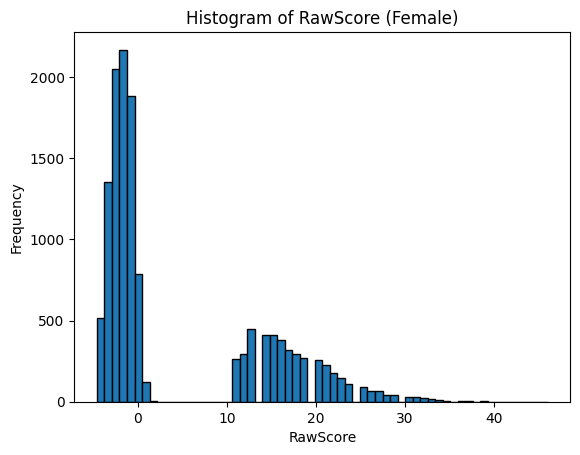

In [38]:
plt.hist(df1[df1["Sex_Code_Text"] == "Female"]["RawScore"], bins=60, edgecolor="black")
plt.xlabel("RawScore")
plt.ylabel("Frequency")
plt.title("Histogram of RawScore (Female)")
plt.show()

In [39]:
df1[df1["Sex_Code_Text"] == "Female"]["RawScore"].describe()

count    13329.000000
mean         4.644252
std          9.666913
min         -4.560000
25%         -2.250000
50%         -0.940000
75%         14.000000
max         46.000000
Name: RawScore, dtype: float64

### Raw Score - Men

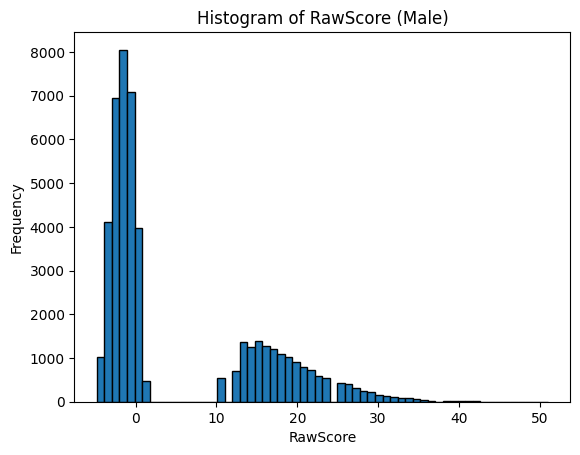

In [40]:
plt.hist(df1[df1["Sex_Code_Text"] == "Male"]["RawScore"], bins=60, edgecolor="black")
plt.xlabel("RawScore")
plt.ylabel("Frequency")
plt.title("Histogram of RawScore (Male)")
plt.show()

In [41]:
df1[df1["Sex_Code_Text"] == "Male"]["RawScore"].describe()

count    47514.000000
mean         5.204105
std         10.190263
min         -4.790000
25%         -2.030000
50%         -0.630000
75%         15.000000
max         51.000000
Name: RawScore, dtype: float64

### Raw Score - by Ethnicity

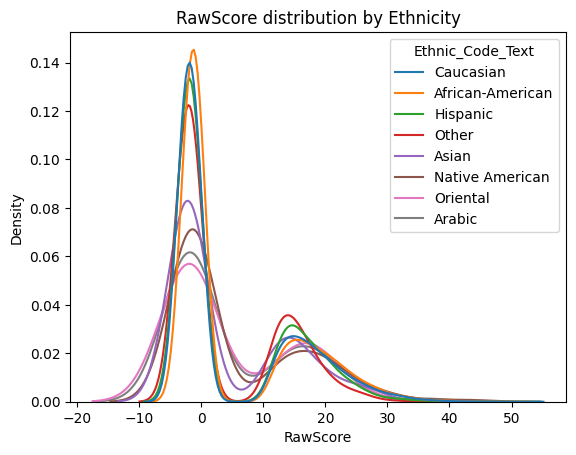

In [42]:
sns.kdeplot(data=df1, x="RawScore", hue="Ethnic_Code_Text", common_norm=False)
plt.title("RawScore distribution by Ethnicity")
plt.show()

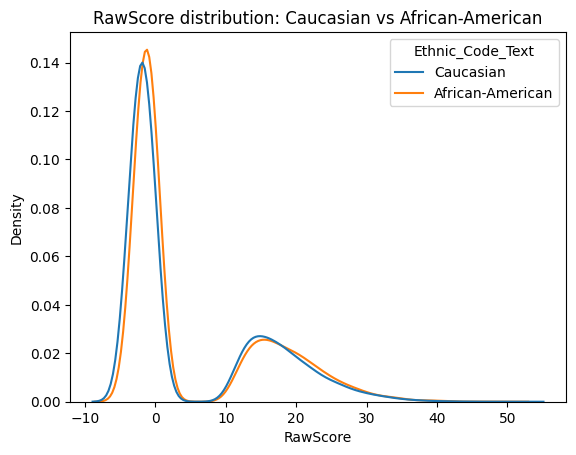

In [43]:
# Filter the dataframe
df_filtered = df1[df1["Ethnic_Code_Text"].isin(["Caucasian", "African-American"])]

# KDE plot
sns.kdeplot(data=df_filtered, x="RawScore", hue="Ethnic_Code_Text", common_norm=False)
plt.title("RawScore distribution: Caucasian vs African-American")
plt.show()

In [44]:
df_counts = df1.groupby("Ethnic_Code_Text").size().reset_index(name="Count")
print(df_counts)

   Ethnic_Code_Text  Count
0  African-American  27069
1            Arabic     75
2             Asian    324
3         Caucasian  21783
4          Hispanic   8742
5   Native American    219
6          Oriental     39
7             Other   2592


## Decile Score

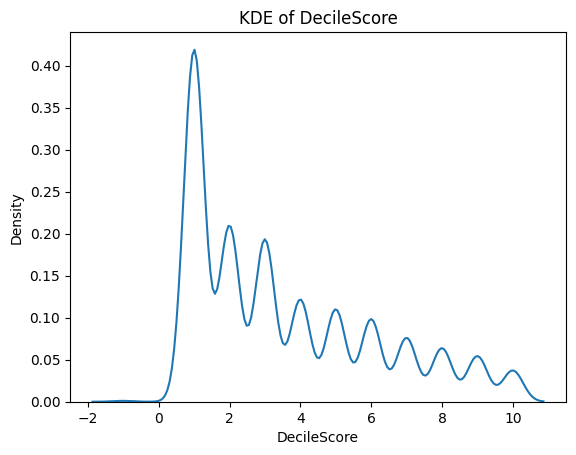

In [50]:
# plt.hist(df1["DecileScore"], bins=12, edgecolor="black")
sns.kdeplot(data=df1, x="DecileScore", common_norm=False)
plt.xlabel("DecileScore")
plt.ylabel("Density")
plt.title("KDE of DecileScore")
plt.show()

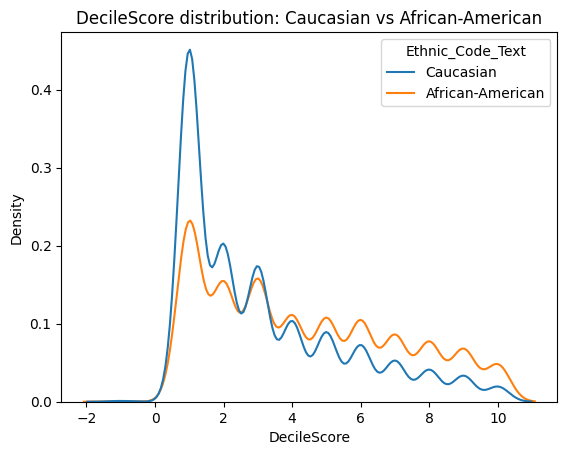

In [46]:
# Filter the dataframe
df_filtered = df1[df1["Ethnic_Code_Text"].isin(["Caucasian", "African-American"])]

# KDE plot
sns.kdeplot(data=df_filtered, x="DecileScore", hue="Ethnic_Code_Text", common_norm=False)
plt.title("DecileScore distribution: Caucasian vs African-American")
plt.show()

## Correlation Matrices

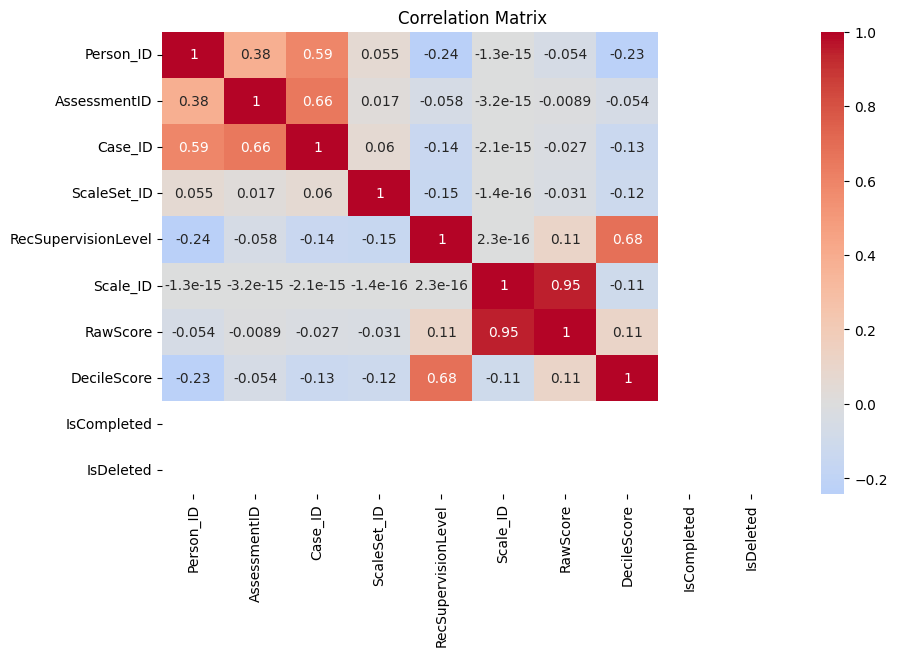

In [51]:
# Compute correlation matrix
corr = df1.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

# Cox-violent-parsed

In [54]:
df2 = pd.read_csv("data/cox-violent-parsed.csv")
df2

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
2,3.0,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,...,Risk of Violence,2,Low,31/12/2014,30/12/2014,03/01/2015,0,3,457,0
3,4.0,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,...,Risk of Violence,1,Low,27/01/2013,26/01/2013,05/02/2013,0,9,159,1
4,5.0,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,...,Risk of Violence,3,Low,14/04/2013,16/06/2013,16/06/2013,4,0,63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18311,NaN,alexsandra beauchamps,alexsandra,beauchamps,29/12/2014,Female,21/12/1984,31,25 - 45,African-American,...,Risk of Violence,4,Low,29/12/2014,28/12/2014,07/01/2015,5,9,459,0
18312,NaN,winston gregory,winston,gregory,14/01/2014,Male,01/10/1958,57,Greater than 45,Other,...,Risk of Violence,1,Low,14/01/2014,13/01/2014,14/01/2014,0,0,808,0
18313,NaN,farrah jean,farrah,jean,09/03/2014,Female,17/11/1982,33,25 - 45,African-American,...,Risk of Violence,2,Low,09/03/2014,08/03/2014,09/03/2014,3,0,754,0
18314,NaN,florencia sanmartin,florencia,sanmartin,30/06/2014,Female,18/12/1992,23,Less than 25,Hispanic,...,Risk of Violence,4,Low,30/06/2014,15/03/2015,15/03/2015,2,0,258,0


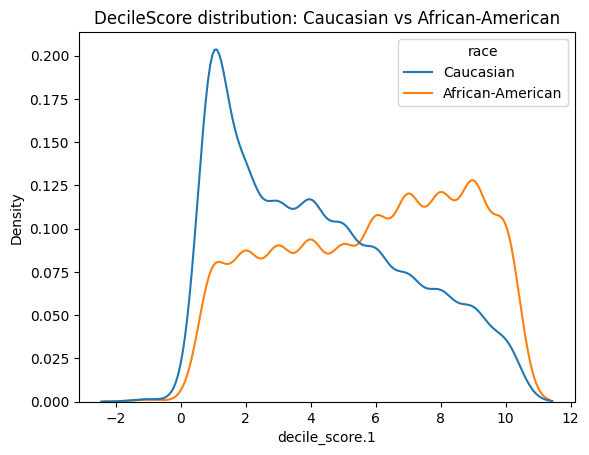

In [56]:
# Filter the dataframe
df_filtered2 = df2[df2["race"].isin(["Caucasian", "African-American"])]

# KDE plot
sns.kdeplot(data=df_filtered2, x="decile_score.1", hue="race", common_norm=False)
plt.title("DecileScore distribution: Caucasian vs African-American")
plt.show()

## Correlation Matrix Filtered

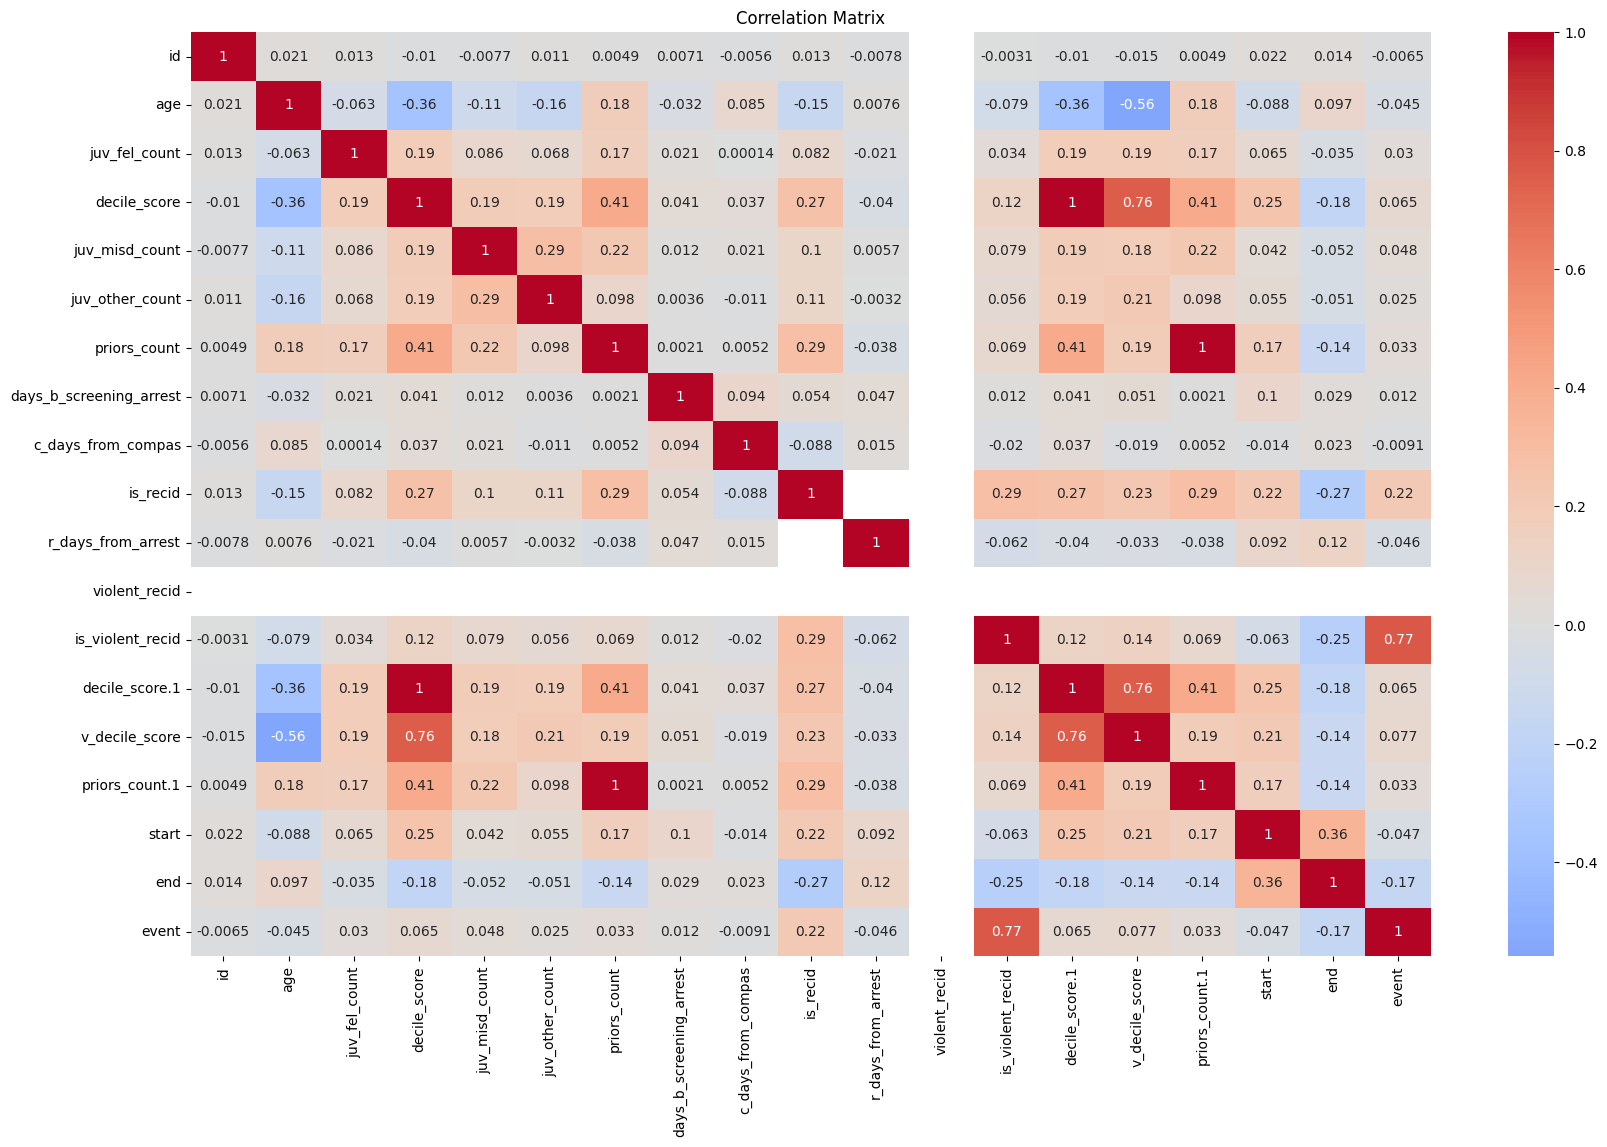

In [58]:
# Compute correlation matrix
corr = df2.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

## Correlation Matrix Filtered by African American

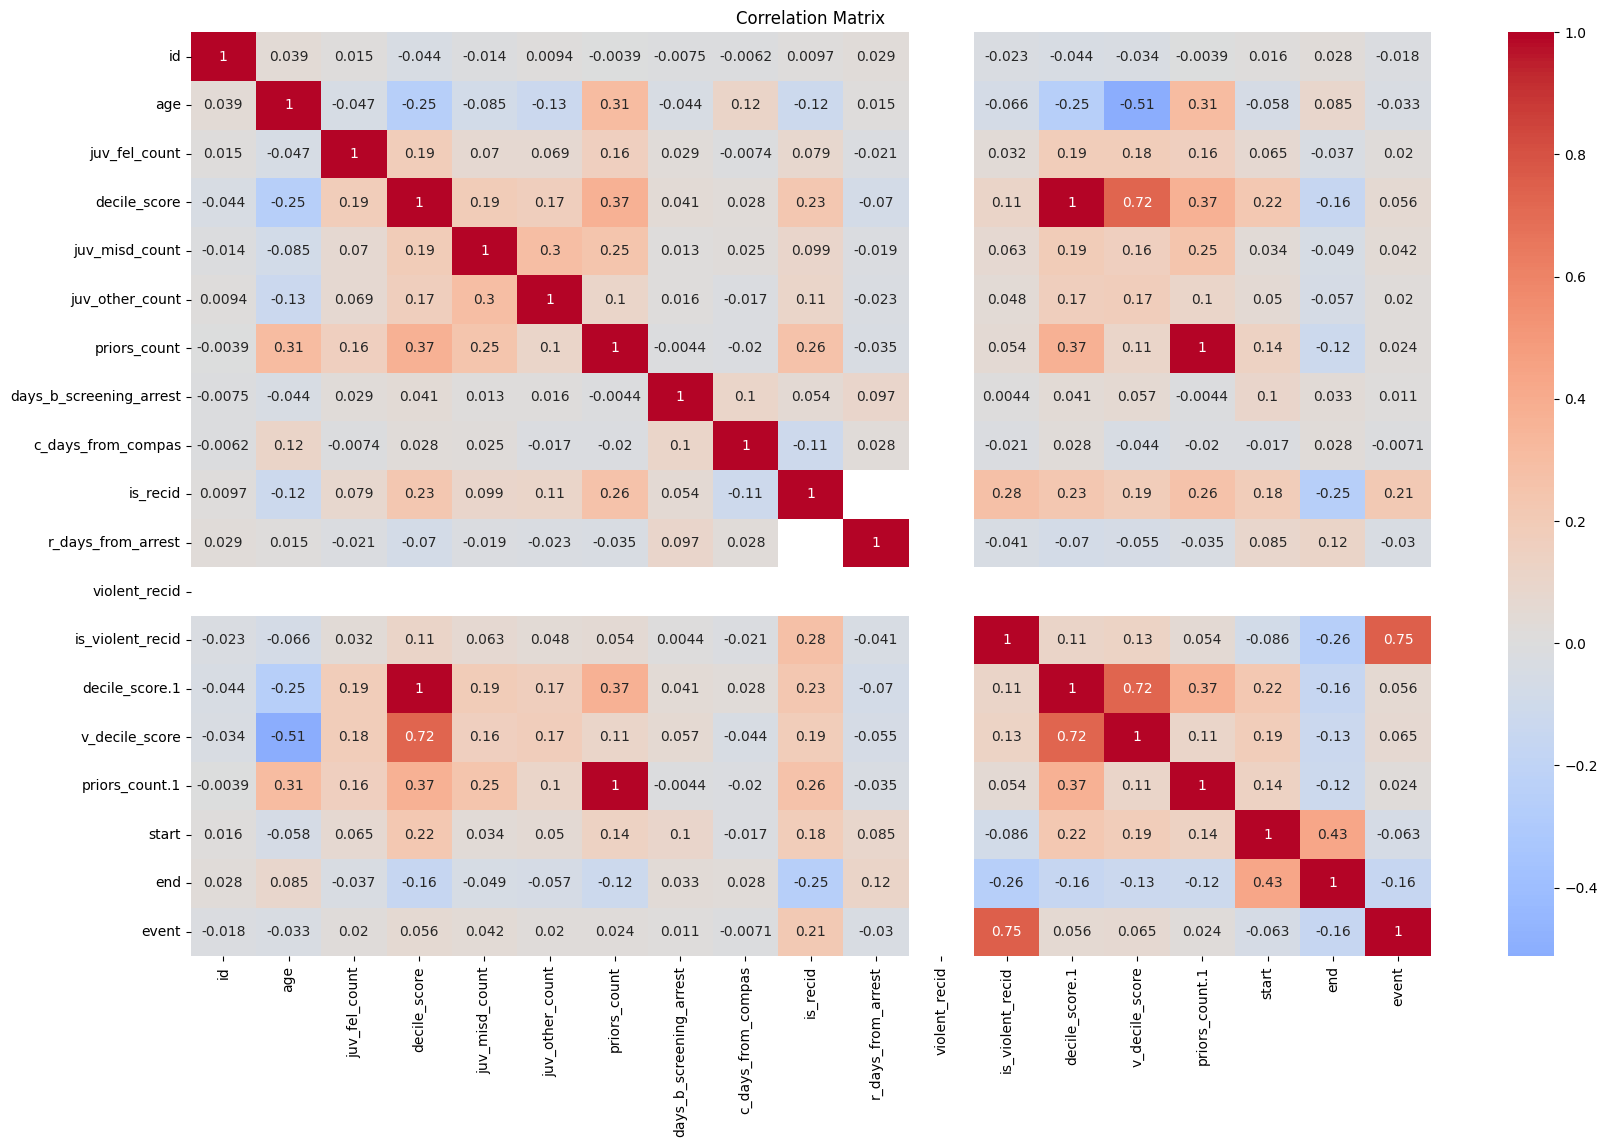

In [61]:
african_am = df2[df2["race"] == "African-American"]

# Compute correlation matrix
corr_af = african_am.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

## Correlation Matrix Filtered by Caucasian

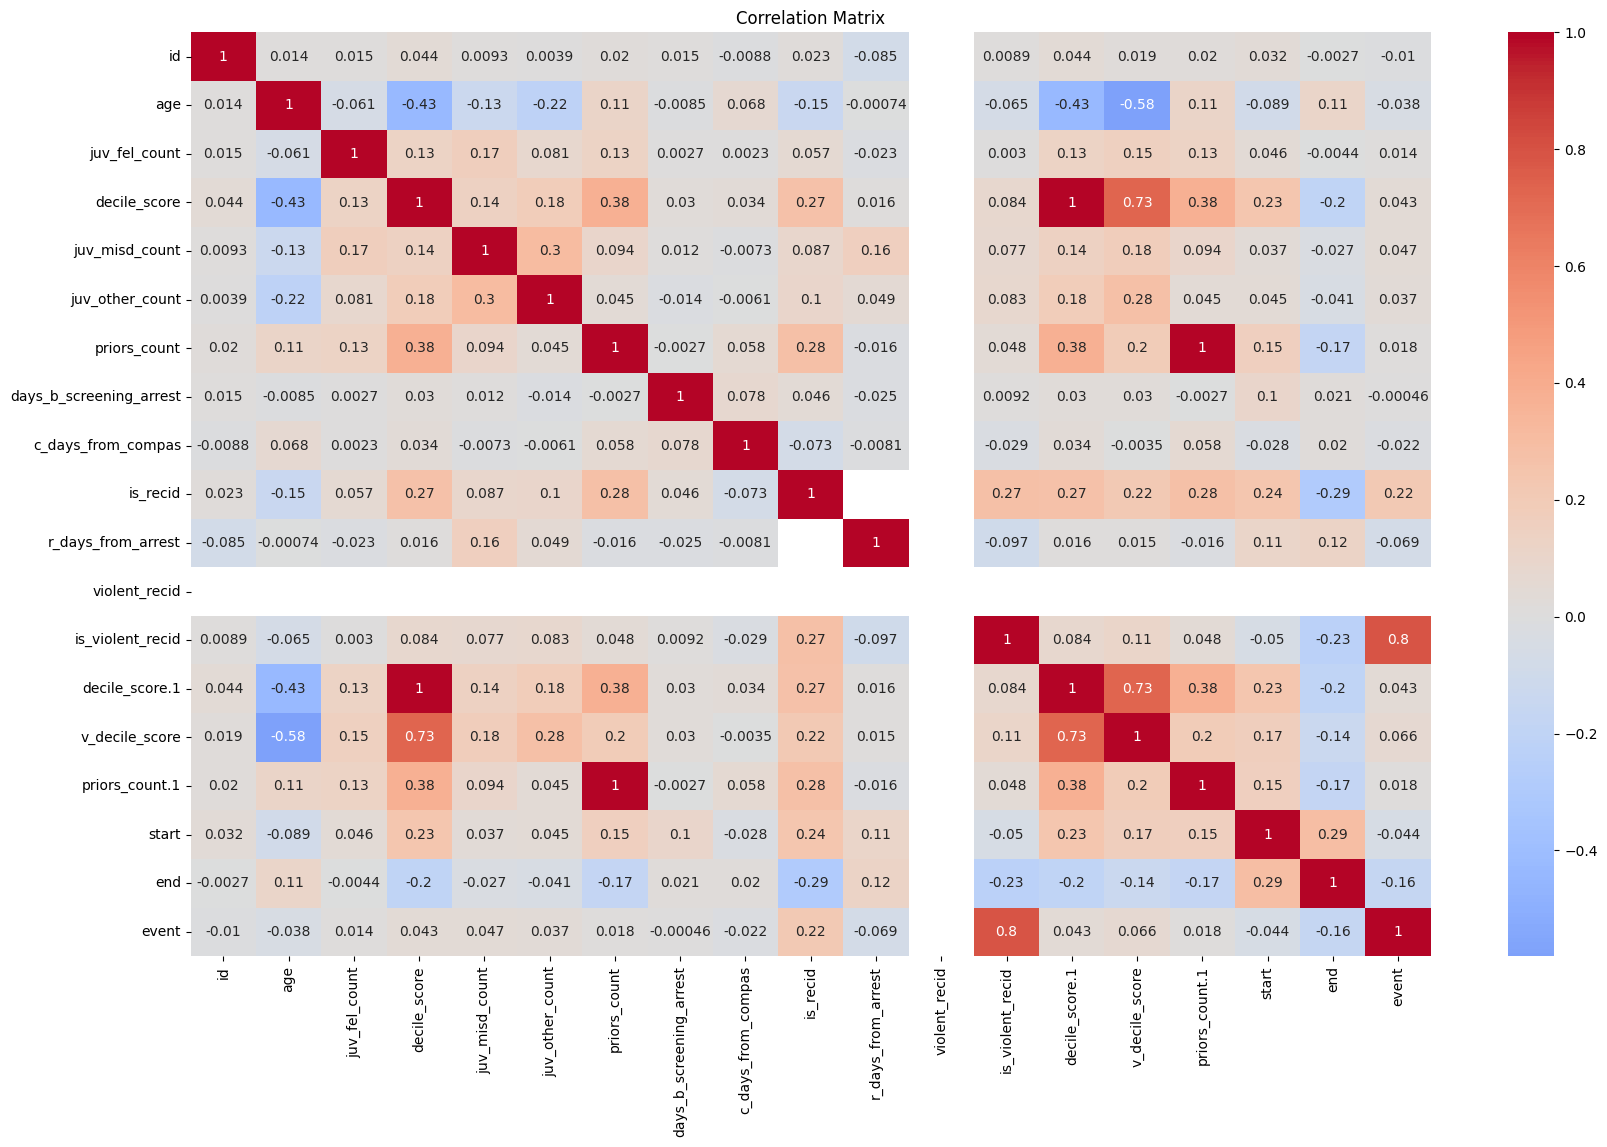

In [63]:
caucasian = df2[df2["race"] == "Caucasian"]

# Compute correlation matrix
corr_cau = caucasian.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr_cau, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

## Correlation Difference between Caucasian and African American

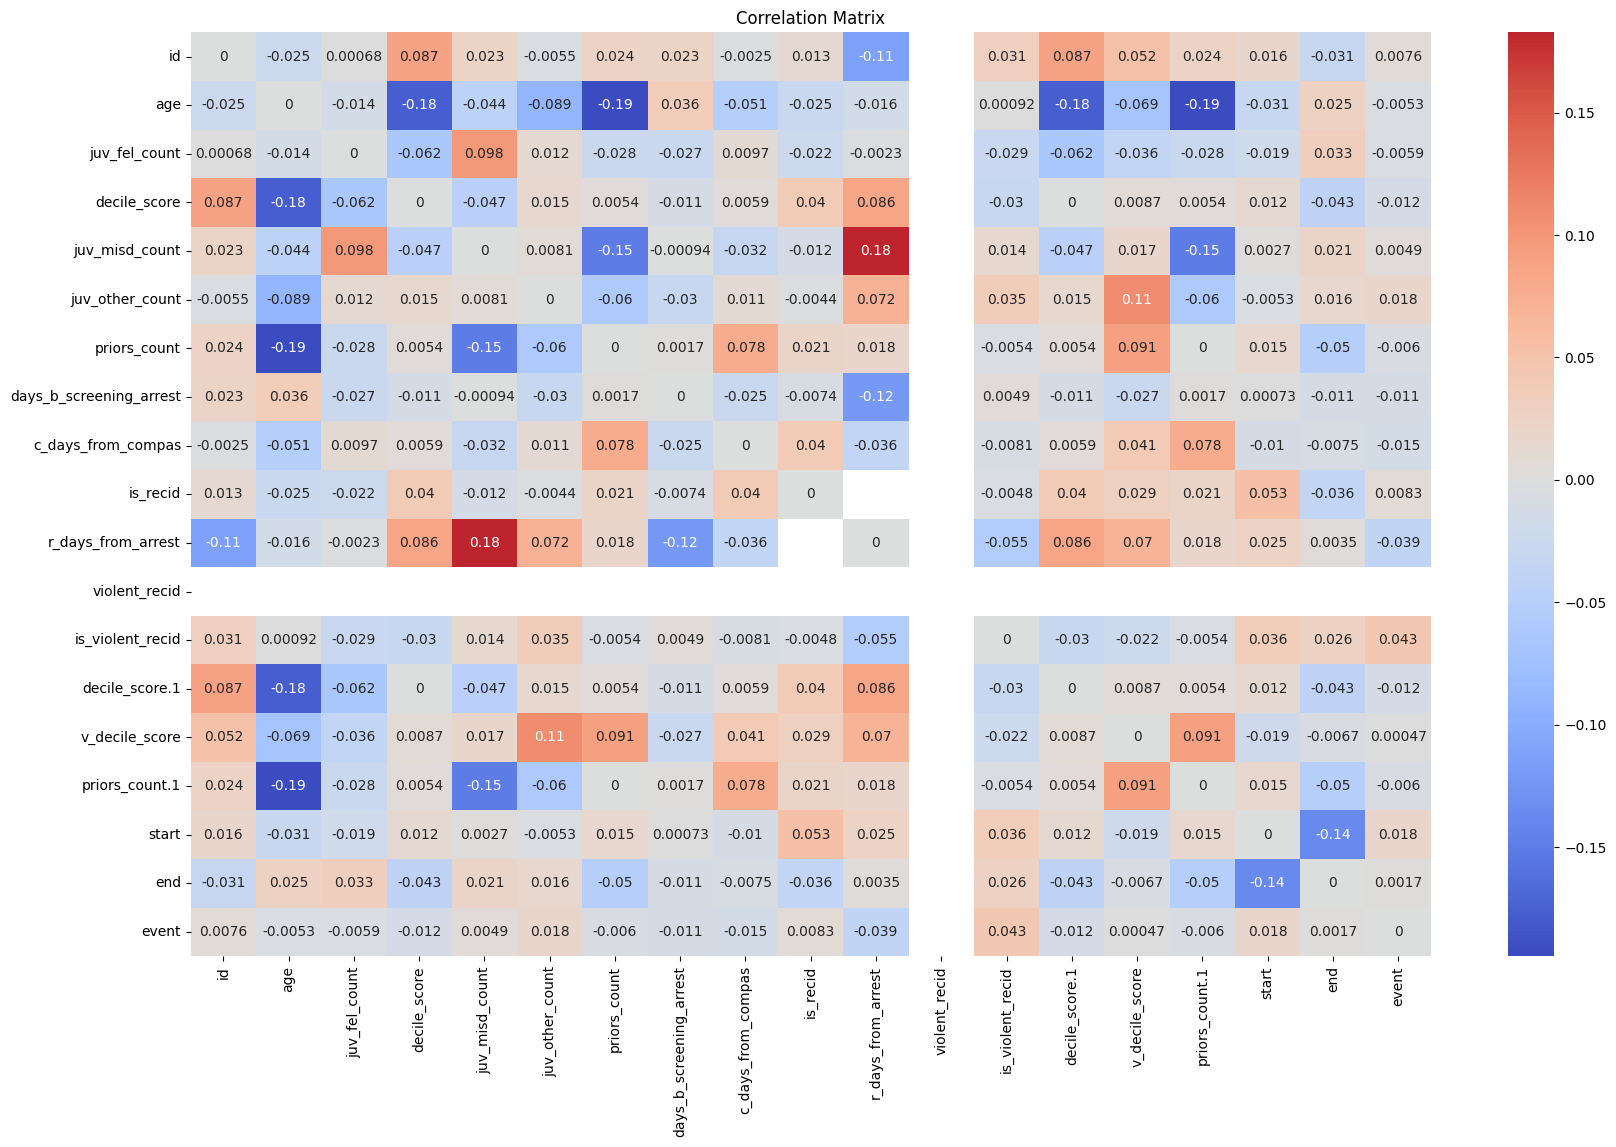

In [64]:
corr = corr_cau - corr_af

# Plot heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()